<a href="https://colab.research.google.com/github/official-okello/DS_bootcamp_with_gomycode/blob/master/Kenya_National_Government_Unsettled_Debt_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0: INTRODUCTION**




## 0.1: Kenyan Government Budget Data Exploration and Analysis (2013/14 - 2024/25)

This is a detailed exploration of the Kenyan government's budget data spanning from the fiscal year 2013/14 to 2024/25. This analysis aims to provide critical insights into the nation's fiscal management over the past decade, identifying key trends in budget utilization, the patterns of pending bills, and the evolving sectoral funding priorities across various government departments.

Understanding how public funds are allocated and utilized is paramount for effective governance, accountability, and ultimately, for achieving our national development goals. This exploration will move beyond simply looking at the numbers. We will delve into the efficiency of budget execution, the accumulation of financial obligations, and the strategic emphasis placed on different sectors of our economy.

Our approach will involve a rigorous process of data extraction, meticulous cleaning to ensure accuracy and consistency, strategic transformation to derive meaningful metrics, and insightful analysis to uncover underlying patterns. Finally, we will visualize these findings through a series of charts designed to clearly communicate the key takeaways.

By the end of this presentation, we aim to answer crucial questions such as:

* How effectively have government departments utilized their allocated budgets over time?
* What is the magnitude and distribution of pending bills across different departments, and what trends can we observe?
* Which sectors have been prioritized in terms of budget allocation, and how have these priorities shifted over the years?
* Can we identify departments that consistently demonstrate high or low budget utilization or significant accumulation of pending bills?
* What are the overarching trends in recurrent versus development expenditure?

The insights gained from this analysis will be invaluable for policymakers, researchers, and citizens alike, fostering a deeper understanding of Kenya's fiscal landscape and informing future budgetary decisions

# **1: Data Extraction and Exploration**

## *1.1: Loading the Dataset*

In [ ]:
import pandas as pd

data = pd.read_csv('/content/subsectors.csv')

## *1.2: Viewing the dataset*

In [ ]:
data.head()

,Department/Programme,Year,Economic Classification,Approved Budget (KES M),Actual Expenditure (KES M),Recurrent Pending Bills (KES M),Development Pending Bills (KES M)
0,Basic Education,2013/14,Development Budget,"8,717.00","8,500.00",50,33
1,Basic Education,2013/14,Recurrent Budget,"45,081.00","44,500.00",33,50
2,Basic Education,2014/15,Development Budget,"7,725.00","7,500.00",150,239
3,Basic Education,2014/15,Recurrent Budget,"52,937.00","52,000.00",200,189
4,Basic Education,2015/16,Development Budget,"3,488.00","3,300.00",230,212


## *1.3: Information on the Dataset*

Observation, all columns are non-numerical and we have some missing data in each column

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Department/Programme               510 non-null    object
 1   Year                               510 non-null    object
 2   Economic Classification            510 non-null    object
 3   Approved Budget (KES M)            510 non-null    object
 4   Actual Expenditure (KES M)         510 non-null    object
 5   Recurrent Pending Bills (KES M)    511 non-null    object
 6   Development Pending Bills (KES M)  512 non-null    object
dtypes: object(7)
memory usage: 28.3+ KB


## *1.4: Columns*

In [ ]:
data.columns

Index(['Department/Programme', 'Year', 'Economic Classification',
       'Approved Budget (KES M)', 'Actual Expenditure (KES M)',
       'Recurrent Pending Bills (KES M)', 'Development Pending Bills (KES M)'],
      dtype='object')

## *1.5: Description of columns*

Since there are no numerical fields, not much statistical description can be seen.

We can see the modes(top) of each column, their unique values, frequency and counts

In [ ]:
data.describe(include='all') # include='all' disp;ays even non-numerical columns,

,Department/Programme,Year,Economic Classification,Approved Budget (KES M),Actual Expenditure (KES M),Recurrent Pending Bills (KES M),Development Pending Bills (KES M)
count,510,510,510,510,510,511,512
unique,42,14,15,353,251,186,81
top,State Department for Industrialization,2018/19,Development Budget,0,0,0,0
freq,98,102,171,77,78,273,421


# **2: Data Cleaning**

To include:

- Addressing inconsistencies like commas in numeric fields
- Standardizing department names to remove duplicates
- Handling missing values represented as zeros
- Identifying and consolidating duplicate entries

## *2.1: Removing commas from numeric fields after conversion while filling null values with 0*

In [ ]:
for col in data.iloc[:, 3:]: # iloc[:, 3:] gets all rows for columns 4 to the end
  data.loc[:, col] = data.loc[:, col].fillna(0).astype(str).str.replace(',', '', regex=False) # replaces commas with an empty string without checking for regular expression
  data[col] = pd.to_numeric(data[col], errors='coerce') # converts to numerical values, displays NaN wherever the conversion can't happen

data.info() # notice change of datatypes to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Department/Programme               510 non-null    object 
 1   Year                               510 non-null    object 
 2   Economic Classification            510 non-null    object 
 3   Approved Budget (KES M)            516 non-null    float64
 4   Actual Expenditure (KES M)         516 non-null    float64
 5   Recurrent Pending Bills (KES M)    516 non-null    float64
 6   Development Pending Bills (KES M)  516 non-null    float64
dtypes: float64(4), object(3)
memory usage: 28.3+ KB


## *2.2: Converting Departments/Programme  and Economic Classification to lower case and remove whitespaces for standardization*

In [ ]:
data['Department/Programme'] = data['Department/Programme'].str.strip().str.lower()
data['Economic Classification'] = data['Economic Classification'].str.strip().str.lower()
data.tail()

,Department/Programme,Year,Economic Classification,Approved Budget (KES M),Actual Expenditure (KES M),Recurrent Pending Bills (KES M),Development Pending Bills (KES M)
511,state department for industrialization,2020,gross,1000.7,980.2,20.5,0.0
512,state department for tourism,2018,gross,120.0,50.0,70.0,0.0
513,state department for tourism,2019,gok,50.0,50.0,0.0,0.0
514,state department for tourism,2019,grants,730.0,200.5,529.5,0.0
515,state department for tourism,2020,gross,225.3,186.0,39.3,0.0


## *2.3: Number of duplicates in Department/Programme*

In [ ]:
data['Department/Programme'].duplicated().sum() # so many duplicates because obviously a department/program is bound to receive more than one allocations

np.int64(473)

## *2.4: Sum of nulls per column*

In [ ]:
data.isnull().sum() # we see nulls for all fields

,0
Department/Programme,6
Year,6
Economic Classification,6
Approved Budget (KES M),0
Actual Expenditure (KES M),0
Recurrent Pending Bills (KES M),0
Development Pending Bills (KES M),0


## *2.5: Shape of the dataset*

In [ ]:
data.shape # checking number of rows(516) and columms(7)

(516, 7)

## *2.6: Handling Missing values*

Initialy, some missing values were filled by 0 during conversion to numerical values

For handling, it is best in this case not not drop or impute the record as the data is only used for analysis, we will handle them after consolidating duplicates.

In [ ]:
#handling missing values represented by zeros

## *2.7: Handling duplicates*

Consolidating the duplicates by grouping then dropping duplicated consolidations

In [ ]:
data = data.groupby(['Department/Programme', 'Year', 'Economic Classification']).sum().reset_index() # reset_index gives the new dataframe a new indexing
data.drop_duplicates(subset=['Department/Programme', 'Year', 'Economic Classification'], inplace=True) # inplace=True modifies the data directly without creating a new object
# data.dropna(subset=['Department/Programme', 'Year', 'Economic Classification'], inplace=True)

data.shape #Notice significant reduction of number of rows due to consolidation and removal of duplicates

(390, 7)

In [ ]:
data.head()

,Department/Programme,Year,Economic Classification,Approved Budget (KES M),Actual Expenditure (KES M),Recurrent Pending Bills (KES M),Development Pending Bills (KES M)
0,agriculture,2013/14,development budget,60180.0,57000.0,1180.0,2000.0
1,agriculture,2013/14,recurrent budget,23232.0,22000.0,1047.0,185.0
2,agriculture,2014/15,development budget,65924.0,64000.0,1924.0,0.0
3,agriculture,2014/15,recurrent budget,26869.0,26000.0,479.0,390.0
4,agriculture,2015/16,development budget,58210.0,56000.0,1210.0,1000.0


In [ ]:
data.info() # Notice no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Department/Programme               390 non-null    object 
 1   Year                               390 non-null    object 
 2   Economic Classification            390 non-null    object 
 3   Approved Budget (KES M)            390 non-null    float64
 4   Actual Expenditure (KES M)         390 non-null    float64
 5   Recurrent Pending Bills (KES M)    390 non-null    float64
 6   Development Pending Bills (KES M)  390 non-null    float64
dtypes: float64(4), object(3)
memory usage: 21.5+ KB


# **3: Data Transformation**


- Ensuring all budget and expenditure columns are in numerical format
- Creating new columns to measure budget efficiency and pending bills
- Categorizing the data into Recurrent and Development budgets

## *3.1: Ensuring all budget and expenditure columns are in numerical format*

This was tackled during the Cleaning stage

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Department/Programme               390 non-null    object 
 1   Year                               390 non-null    object 
 2   Economic Classification            390 non-null    object 
 3   Approved Budget (KES M)            390 non-null    float64
 4   Actual Expenditure (KES M)         390 non-null    float64
 5   Recurrent Pending Bills (KES M)    390 non-null    float64
 6   Development Pending Bills (KES M)  390 non-null    float64
dtypes: float64(4), object(3)
memory usage: 21.5+ KB


## *3.2: New Columns to measure budget effiency and pending bills*

Added columns:
- Total Pending Bills: Sum of Recurrent and Development Pending Bills
- Budget Variance: Difference between Approved Budget and Actual Expenditure
- Utilization Rate: Ratio of Actual Expenditure to Approved Budget in percent

In [ ]:
total_pending_bills = data['Recurrent Pending Bills (KES M)'] + data['Development Pending Bills (KES M)']
data['Total Pending Bills (KES M)'] = total_pending_bills

budget_variance = data['Approved Budget (KES M)'] - data['Actual Expenditure (KES M)']
data['Budget Variance'] = budget_variance

utilization_rate = (data['Actual Expenditure (KES M)'] / data['Approved Budget (KES M)']) * 100
data['Utilization Rate (%)'] = utilization_rate

data.head()

,Department/Programme,Year,Economic Classification,Approved Budget (KES M),Actual Expenditure (KES M),Recurrent Pending Bills (KES M),Development Pending Bills (KES M),Total Pending Bills (KES M),Budget Variance,Utilization Rate (%)
0,agriculture,2013/14,development budget,60180.0,57000.0,1180.0,2000.0,3180.0,3180.0,94.715852
1,agriculture,2013/14,recurrent budget,23232.0,22000.0,1047.0,185.0,1232.0,1232.0,94.696970
2,agriculture,2014/15,development budget,65924.0,64000.0,1924.0,0.0,1924.0,1924.0,97.081488
3,agriculture,2014/15,recurrent budget,26869.0,26000.0,479.0,390.0,869.0,869.0,96.765790
4,agriculture,2015/16,development budget,58210.0,56000.0,1210.0,1000.0,2210.0,2210.0,96.203401


## *3.3: Categorizing the data as Recurrent and Development Budgets into a Category column*

In [ ]:
data['Economic Classification'] = data['Economic Classification'].astype(str).str.lower().str.strip()
# categorizing program if it matches
def categorize(program):
  program = str(program)
  if 'development' in program:
    return 'Development'
  elif 'recurrent' in program:
    return 'Recurrent'
  else:
    return 'Other'

data['Category'] = data['Economic Classification'].apply(categorize) # apply() applies the categorize function to the Economic Classificaion column

data.head()

,Department/Programme,Year,Economic Classification,Approved Budget (KES M),Actual Expenditure (KES M),Recurrent Pending Bills (KES M),Development Pending Bills (KES M),Total Pending Bills (KES M),Budget Variance,Utilization Rate (%),Category
0,agriculture,2013/14,development budget,60180.0,57000.0,1180.0,2000.0,3180.0,3180.0,94.715852,Development
1,agriculture,2013/14,recurrent budget,23232.0,22000.0,1047.0,185.0,1232.0,1232.0,94.696970,Recurrent
2,agriculture,2014/15,development budget,65924.0,64000.0,1924.0,0.0,1924.0,1924.0,97.081488,Development
3,agriculture,2014/15,recurrent budget,26869.0,26000.0,479.0,390.0,869.0,869.0,96.765790,Recurrent
4,agriculture,2015/16,development budget,58210.0,56000.0,1210.0,1000.0,2210.0,2210.0,96.203401,Development


# **4: Data Analysis**


- Descriptive statistic for Approved Budget, Actual Expenditure, and
Total Pending Bills by department and year
- Average Utilization Rate per department
- Departments that have the highest pending bills
- Trends to analyze in budget allocation over time

## *4.1: Descriptive statistics for Approved Budget, Actual Expenditure, and Total Pending Bills by department and year*

In [ ]:
# groupby department/program
statistics = data.groupby(['Year','Department/Programme'])[['Approved Budget (KES M)', 'Actual Expenditure (KES M)', 'Total Pending Bills (KES M)']].describe()
statistics.to_csv('statistics.csv') # saves statistics in a csv
statistics

Approved Budget (KES M)               \
                                                count         mean   
Year    Department/Programme                                         
2013/14 agriculture                               2.0   41706.0000   
        basic education                           2.0   26899.0000   
        co-operatives                             4.0     100.2500   
        east africa community                     4.0     365.7500   
        energy ict                                2.0  117171.5000   
...                                               ...          ...   
2020/21 trade                                     4.0     862.5975   
        vocational                                2.0    5165.5000   
2022/23 general economic                          2.0   31770.1800   
2023/24 general economic                          2.0   40903.7700   
2024/25 general economic                          2.0   47969.2450   

                                                                    \
                                         std       min         25%   
Year    Department/Programme                                         
2013/14 agriculture             26126.181351  23232.00  32469.0000   
        basic education         25713.230991   8717.00  17808.0000   
        co-operatives             191.280553      0.00      0.0000   
        east africa community     709.014516      0.00      0.0000   
        energy ict             106632.409710  41771.00  79471.2500   
...                                      ...       ...         ...   
2020/21 trade                    1253.718328      0.00      0.0000   
        vocational               1543.614103   4074.00   4619.7500   
2022/23 general economic        12301.989221  23071.36  27420.7700   
2023/24 general economic        22689.769674  24859.68  32881.7250   
2024/25 general economic        30055.920217  26716.50  37342.8725   

                                                                   \
                                      50%          75%        max   
Year    Department/Programme                                        
2013/14 agriculture             41706.000   50943.0000   60180.00   
        basic education         26899.000   35990.0000   45081.00   
        co-operatives               7.000     107.2500     387.00   
        east africa community      17.000     382.7500    1429.00   
        energy ict             117171.500  154871.7500  192572.00   
...                                   ...          ...        ...   
2020/21 trade                     396.345    1258.9425    2657.70   
        vocational               5165.500    5711.2500    6257.00   
2022/23 general economic        31770.180   36119.5900   40469.00   
2023/24 general economic        40903.770   48925.8150   56947.86   
2024/25 general economic        47969.245   58595.6175   69221.99   

                              Actual Expenditure (KES M)            ...  \
                                                   count      mean  ...   
Year    Department/Programme                                        ...   
2013/14 agriculture                                  2.0   39500.0  ...   
        basic education                              2.0   26500.0  ...   
        co-operatives                                4.0      90.0  ...   
        east africa community                        4.0     357.5  ...   
        energy ict                                   2.0  115000.0  ...   
...                                                  ...       ...  ...   
2020/21 trade                                        4.0     825.0  ...   
        vocational                                   2.0    5000.0  ...   
2022/23 general economic                             2.0   31500.0  ...   
2023/24 general economic                             2.0   40000.0  ...   
2024/25 general economic                             2.0   47500.0  ...   

                                                  

## *4.2: Average Utilization Rate per department*

Measure of average ratio of Expenditure to Budget allocation per department as a percentage

In [ ]:
average_utilization = data.groupby('Department/Programme')['Utilization Rate (%)'].mean()
average_utilization.head()

,Utilization Rate (%)
Department/Programme,
agriculture,96.355759
basic education,97.727938
co-operatives,92.184505
east africa community,96.370323
energy ict,98.320089


## *4.3: Departments with the highest pending bills*

In [ ]:
highest_pending_bills = data.groupby('Department/Programme')['Total Pending Bills (KES M)'].sum()
highest_pending_bills.sort_values(ascending=False, inplace=True)
highest_pending_bills.head()

,Total Pending Bills (KES M)
Department/Programme,
tsc,15378.0
environment,11801.6
agriculture,11096.0
energy ict,10332.0
health sector,9367.0


## *4.4: Trends to analyze in budget allocation over time*

- Approved Budget
- Actual Expenditure
- Total Pending Bills
- Budget Variance
- Utilization Rate


In [ ]:
budget_trends = data.groupby('Year')[['Approved Budget (KES M)', 'Actual Expenditure (KES M)','Total Pending Bills (KES M)']].sum()
budget_trends['Budget Variance (KES M)'] = budget_trends['Approved Budget (KES M)'] - budget_trends['Actual Expenditure (KES M)']
budget_trends['Utilization Rate (%)'] = (budget_trends['Actual Expenditure (KES M)'] / budget_trends['Approved Budget (KES M)']) * 100

budget_trends.head()

,Approved Budget (KES M),Actual Expenditure (KES M),Total Pending Bills (KES M),Budget Variance (KES M),Utilization Rate (%)
Year,,,,,
2013/14,663121.41,640190.0,21850.06,22931.41,96.541899
2014/15,1277799.57,1255735.0,27348.01,22064.57,98.273237
2015/16,1379006.40,1350960.0,29181.36,28046.40,97.966188
2016/17,783215.01,771700.0,15091.61,11515.01,98.529777
2017/18,165500.00,164100.0,1300.00,1400.00,99.154079


# **5: Data Visualization**

- Bar chart showing the Average Utilization Rate by Department.
- Line chart comparing the Approved Budget vs. Actual Expenditure over the years
for the top 3 departments.
- Total Pending Bills by Department for the top 5
highest using a bar chart.
- Area chart of Recurrent vs. Development Budget Allocation over the years
- Key insights to highlight from each chart

## *5.1: Bar chart showing the Average Utilization Rate by Department*

Insight:

This chart visually highlights which departments are most and least efficient in utilizing their allocated budgets on average across all the years in the dataset.


Personalized Interpretation:

Departments with high utilization rates might indicate effective planning and execution. Conversely, low utilization could suggest over-budgeting, implementation challenges, or delays. Further investigation into the reasons behind these extremes could be valuable. For instance, are consistently low utilization rates tied to specific sectors or years?

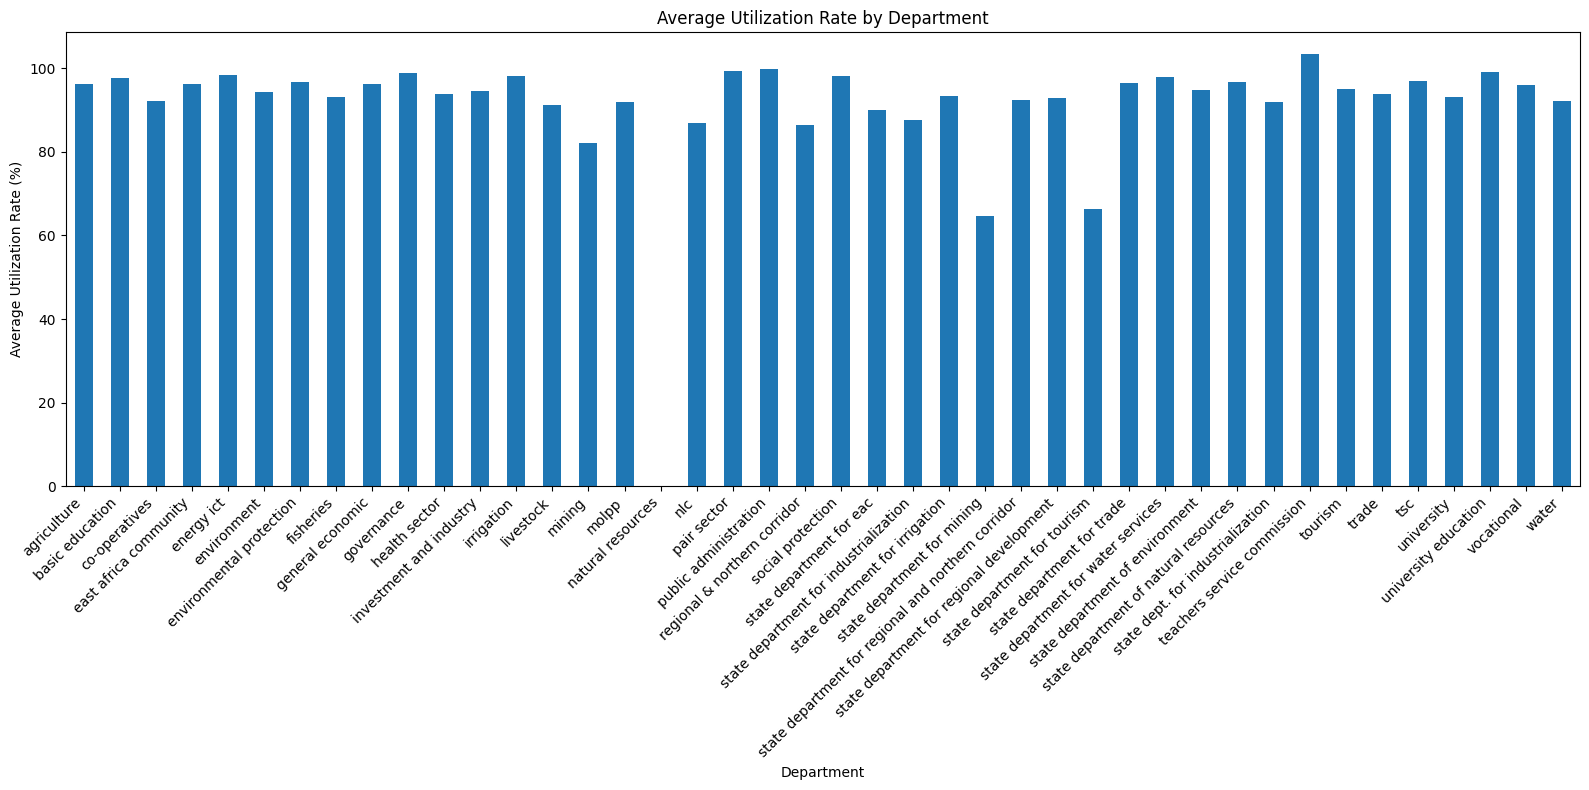

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
average_utilization.plot(kind='bar', title='Average Utilization Rate by Department')
plt.xlabel('Department')
plt.ylabel('Average Utilization Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## *5.2: Line chart comparing the Approved Budget vs. Actual Expenditure over the years for the top 3 departments.*

Insight:

This chart shows the trend of approved budgets and actual expenditures for the three departments with the largest overall budgets over the period. It helps to see if spending consistently aligns with allocations and how the gap (if any) evolves over time.


Personalized Interpretation:

If the lines for approved budget and actual expenditure are close, it indicates good budget execution. Significant and widening gaps might signal issues with budget planning, release of funds, or project implementation. Analyzing the trends for the top-spending departments provides insights into the overall fiscal management of the largest portions of the government's budget.

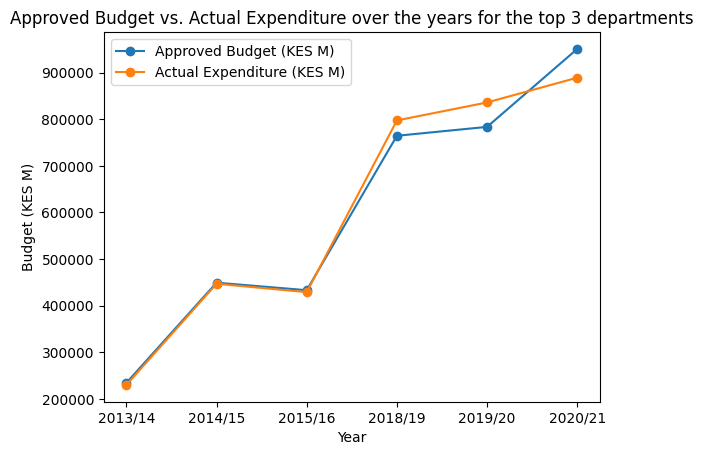

In [ ]:
top_3_departments = data.groupby('Department/Programme')[['Approved Budget (KES M)', 'Actual Expenditure (KES M)']].sum().sum(axis=1).nlargest(3).index
top_3_departments_data = data[data['Department/Programme'].isin(top_3_departments)].groupby(['Year'])[['Approved Budget (KES M)', 'Actual Expenditure (KES M)']].sum()
top_3_departments_data.plot(kind='line', marker='o',title='Approved Budget vs. Actual Expenditure over the years for the top 3 departments')
plt.xlabel('Year')
plt.ylabel('Budget (KES M)')
plt.legend()
plt.show()

## *5.3: Total Pending Bills by Department for the top 5 highest using a bar chart*

Insight:

This chart identifies the departments that have accumulated the highest amounts of unpaid bills. This is a critical indicator of potential financial strain and can impact service delivery and supplier relationships.


Personalized Interpretation:

High pending bills in certain departments could point to systemic issues like insufficient budget allocation for completed projects or services, delays in payment processes, or potential financial mismanagement. Understanding which sectors have the largest pending bills can help prioritize efforts to address these liabilities.

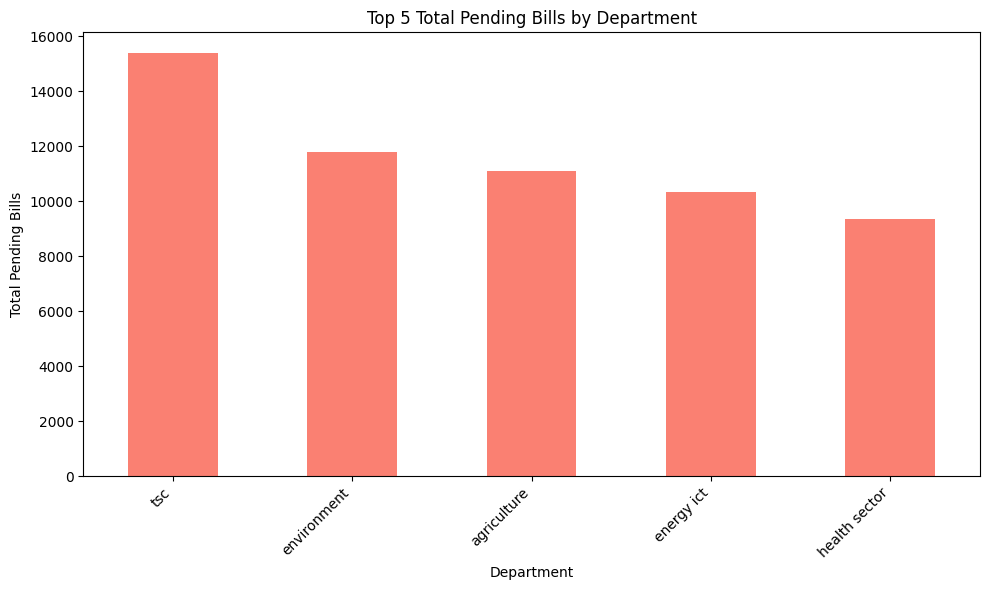

In [ ]:
top_5_pending = highest_pending_bills.head(5)
plt.figure(figsize=(10, 6))
top_5_pending.plot(kind='bar', color='salmon')
plt.title('Top 5 Total Pending Bills by Department')
plt.xlabel('Department')
plt.ylabel('Total Pending Bills')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## *5.4: Area chart of Recurrent vs. Development Budget Allocation over the years*
Insight:

This chart illustrates the shifting priorities in government spending between recurrent (operational) and development (investment) activities over time. It reveals the emphasis placed on immediate needs versus long-term growth initiatives.


Personalized Interpretation:

An increasing trend in development spending might indicate a focus on infrastructure and long-term projects, while a dominant recurrent budget could suggest a larger focus on maintaining existing services. Significant shifts in the ratio between these two categories over the years warrant further examination of the underlying policy changes and economic conditions.

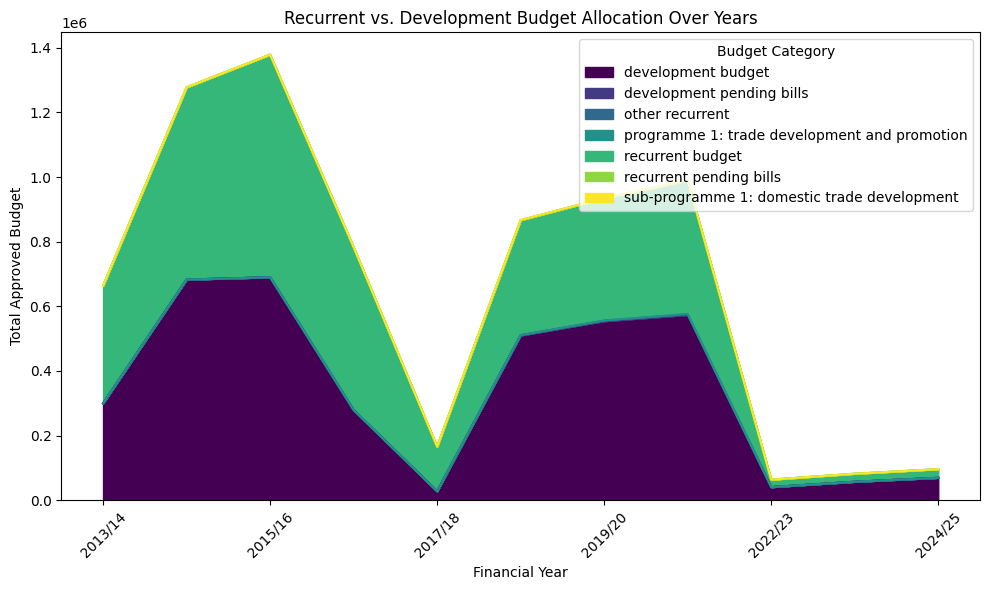

In [ ]:
budget_category_trends = data[data['Category'].isin(['Development','Recurrent'])].groupby(['Year', 'Economic Classification'])['Approved Budget (KES M)'].sum().unstack()
budget_category_trends.plot(kind='area', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Recurrent vs. Development Budget Allocation Over Years')
plt.xlabel('Financial Year')
plt.ylabel('Total Approved Budget')
plt.xticks(rotation=45)
plt.legend(title='Budget Category')
plt.tight_layout()
plt.show()

# **6: General Personalized Insights from the Overall Analysis**


Budget Utilization Trends:
Utilization Rate is closer to 100% meaning high efficiency. 2015-16 was the most expensive FY.

Pending Bill Patterns:
For so many departments, pending bills was zero. Meaning less budget carry-ons to the next FY. TSC accounted for the highest pending bills


Sectoral Funding Priorities:
Lots of funding for Agriculture, Basic education and TSC

Efficiency and Accountability:
Efficiency was mainly good as evident from tne high Utilization Rate

In [ ]:
!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(data, title="Kenya National Govenrment Unsettled Debt Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 61.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]